In [5]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
import keras

In [10]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

ImportError: cannot import name 'Input' from 'keras.models' (C:\Windows\System32\tf_env\Lib\site-packages\keras\models\__init__.py)

In [11]:
#from keras.datasets import mnist
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [12]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [13]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

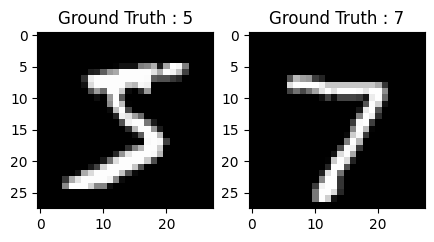

In [14]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [15]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [17]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [19]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [25]:
batch_size = 64
epochs = 3
num_classes = 10

In [27]:
# Import the necessary modules first
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import LeakyReLU  # Add this import for LeakyReLU

# Make sure num_classes is defined before using it
num_classes = 10  # Adjust this value based on your specific classification task

m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))
#fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1))                  
m_model.add(Dense(num_classes, activation='softmax'))

C:\Windows\System32\tf_env\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [28]:
m_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
m_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
m_train = m_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9441 - loss: 0.1889 - val_accuracy: 0.9762 - val_loss: 0.0777
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9818 - loss: 0.0605 - val_accuracy: 0.9818 - val_loss: 0.0599
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9875 - loss: 0.0410 - val_accuracy: 0.9833 - val_loss: 0.0541


In [31]:
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.052093226462602615
Test accuracy: 0.9836000204086304


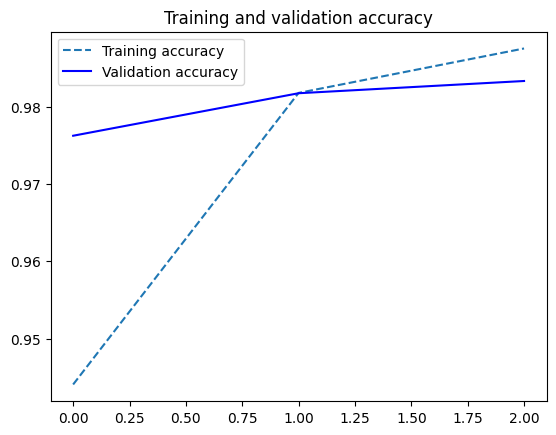

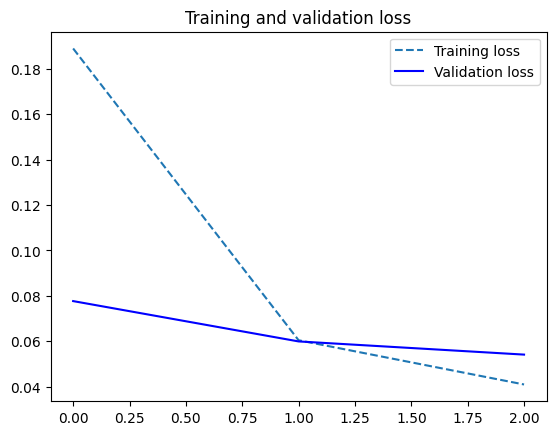

In [33]:
accuracy = m_train.history['accuracy']
val_accuracy = m_train.history['val_accuracy']
loss = m_train.history['loss']
val_loss = m_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
epochs=1
# ADDING DROPOUT
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))
m_model.add(Dropout(0.25))
#fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#fashion_model.add(Dropout(0.25))
#fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#fashion_model.add(Dropout(0.4))
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1))           
m_model.add(Dropout(0.3))
m_model.add(Dense(num_classes, activation='softmax'))

In [35]:
m_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
m_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [37]:
m_train_dropout = m_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.9230 - loss: 0.2551 - val_accuracy: 0.9722 - val_loss: 0.0941


In [40]:
# Corrected code with proper file extension
# Use either .keras (recommended) or .h5 extension
m_model.save("fashion_model_dropout.h5")  # Changed from .h5py to .h5

# Alternative option using the recommended .keras extension
# m_model.save("fashion_model_dropout.keras")

In [41]:
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9745 - loss: 0.0819


In [42]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.08187347650527954
Test accuracy: 0.9745000004768372


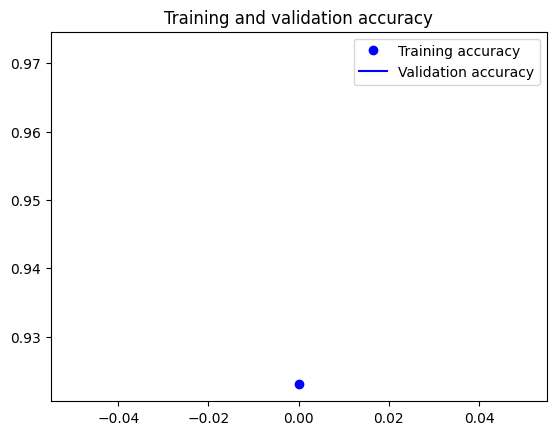

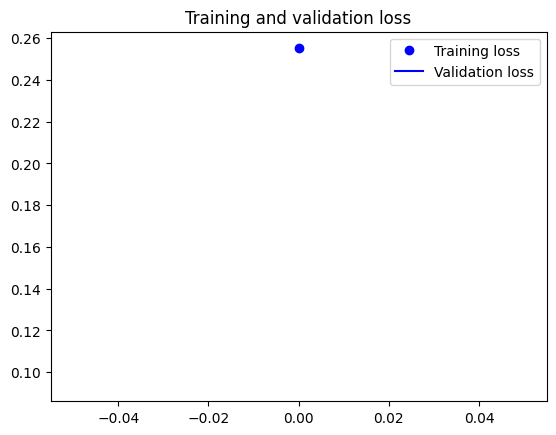

In [44]:
accuracy = m_train_dropout.history['accuracy']
val_accuracy = m_train_dropout.history['val_accuracy']
loss = m_train_dropout.history['loss']
val_loss = m_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
predicted_classes = m_model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [46]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [47]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9708 correct labels


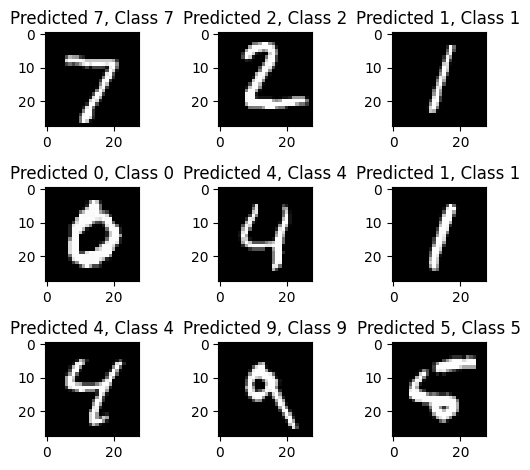

In [48]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 292 incorrect labels


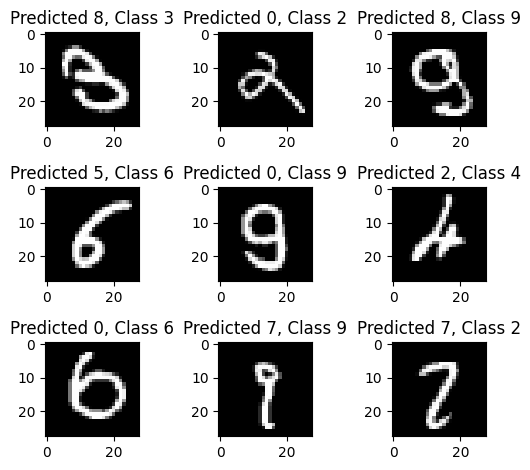

In [49]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [50]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.97      0.97      0.97      1032
     Class 3       0.98      0.97      0.98      1010
     Class 4       0.98      0.97      0.98       982
     Class 5       0.98      0.98      0.98       892
     Class 6       0.99      0.97      0.98       958
     Class 7       0.97      0.96      0.97      1028
     Class 8       0.99      0.95      0.97       974
     Class 9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

